# **Projet P4 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. On a déjà un peu manipulé des données de films donc vous serez pas complètement perdus comme ça. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [70]:
# Importations  des librairies necessaires au projet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='import_data'></a>

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies_bis.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [71]:
# Affichage des données exploratoires de la dataframe
df = pd.read_csv('5000_movies_bis.csv')
pd.set_option('display.max_columns', 30)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [72]:
 ##  combien y a-t-il d'observations/de variables ?

print(df.shape)

## sur combien d'années se répartissent les données ?

print(np.max( df['title_year']) - np.min( df['title_year']) )

##  combien de pays sont représentés ?

print(df['country'].value_counts().shape)

## combien de réalisateurs différents dans la base ?

print(df['director_name'].unique().shape)

## combien d'acteurs et d'actrices différentes ?

actors = pd.Series( df[['actor_1_name','actor_2_name','actor_3_name']].values.flatten())
print(actors.nunique(dropna=True))


(5043, 28)
100.0
(65,)
(2399,)
6255


<a id='data_cleaning'></a>


## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

In [73]:
# Identifier les doublons dans la dataframe 

sum(df.duplicated())

45

In [74]:
#Suppression des doublons de la dataframe

df.drop_duplicates(inplace=True) 
df.shape

(4998, 28)

On dispose de 45 doublons dans la dataframe dont pour plus de fiabilité, j'ai décidé de les supprimer 

#### **Suppression de variables**

In [75]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

In [76]:
df.drop(['plot_keywords', 'movie_imdb_link'], axis =1, inplace =True)

J'ai supprimé ces variables car leurs utilité s'avère moins necessaire à l'étude

# Les valeurs manquantes et les zéros

#Visualisation 

Text(0.5, 1.0, 'Les NaNs')

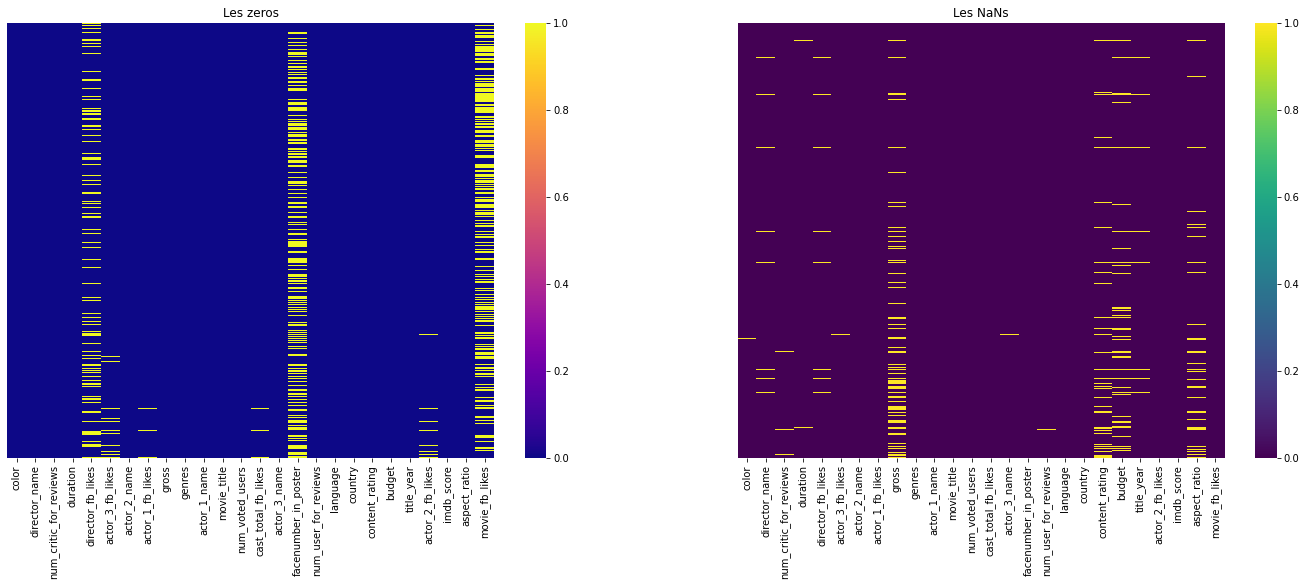

In [77]:
fig, ax = plt.subplots(1,2, figsize=(24,8))
sns.heatmap(df == 0, yticklabels=False, cmap='plasma', ax = ax[0])
ax[0].set_title('Les zeros')
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Les NaNs')


# Gestion des zeros

Pour les valeurs 0, on observe une forte fréquence pour les variables 'director_fb_likes', 'facenumber_in_poster' et 'movie_fb_likes'. Mais la particularité de 'facenumber_in_poster' paraisse incohérence vis-à-vis des deux autres qui semblent être vraies. Le mieux serait de les remplacer par des NaN

In [78]:
# Remplacement des zeros par des NaN sur toutes les colonnes sauf celle de 'fecenumber_in_poster'
cols = df.columns[(df==0).any()].drop('facenumber_in_poster')
df[cols]= df[cols].replace(0, np.nan)

Text(0.5, 0.98, 'Les zeros')

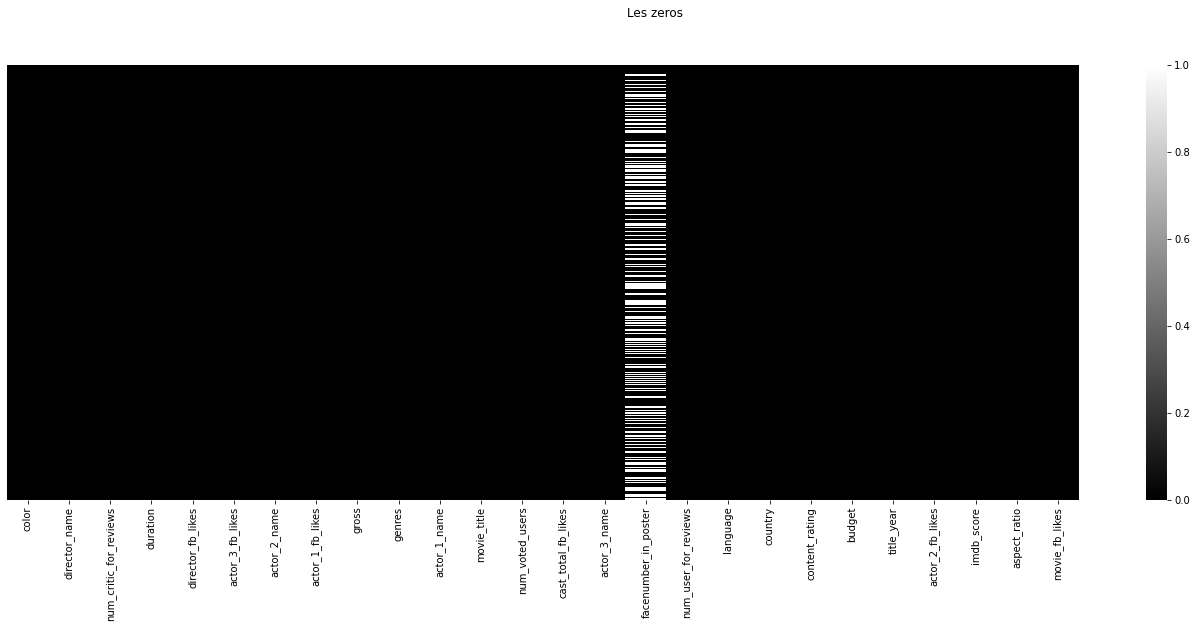

In [79]:
fig = plt.figure(figsize=(24,8))
sns.heatmap(df == 0, yticklabels=False, cmap='gray')
plt.suptitle('Les zeros')


**Gestion des NaN**

In [80]:
df.isnull().sum().sort_values(ascending = False)/len(df)

movie_fb_likes            0.432573
director_fb_likes         0.200080
gross                     0.134254
budget                    0.080232
aspect_ratio              0.065426
content_rating            0.060224
actor_3_fb_likes          0.022409
title_year                0.021409
director_name             0.020608
actor_2_fb_likes          0.013605
num_critic_for_reviews    0.009804
cast_total_fb_likes       0.006603
actor_1_fb_likes          0.006603
actor_3_name              0.004602
num_user_for_reviews      0.004202
color                     0.003802
duration                  0.003001
facenumber_in_poster      0.002601
actor_2_name              0.002601
language                  0.002401
actor_1_name              0.001401
country                   0.001000
num_voted_users           0.000000
movie_title               0.000000
genres                    0.000000
imdb_score                0.000000
dtype: float64

On constate que les la proportion des variables 'movie_fb_likes' et 'director_fb_likes' font elles seules environ 2/3 de la dataframe ce qui peut l'impacter fortement. Donc je décide de ne pas les garder

In [81]:
# Suppression des deux colonnes ayant une part importante des NaN
df.drop(['movie_fb_likes','director_fb_likes'], axis=1, inplace=True)
df.shape

(4998, 24)

Text(0.5, 0.98, 'Les zeros')

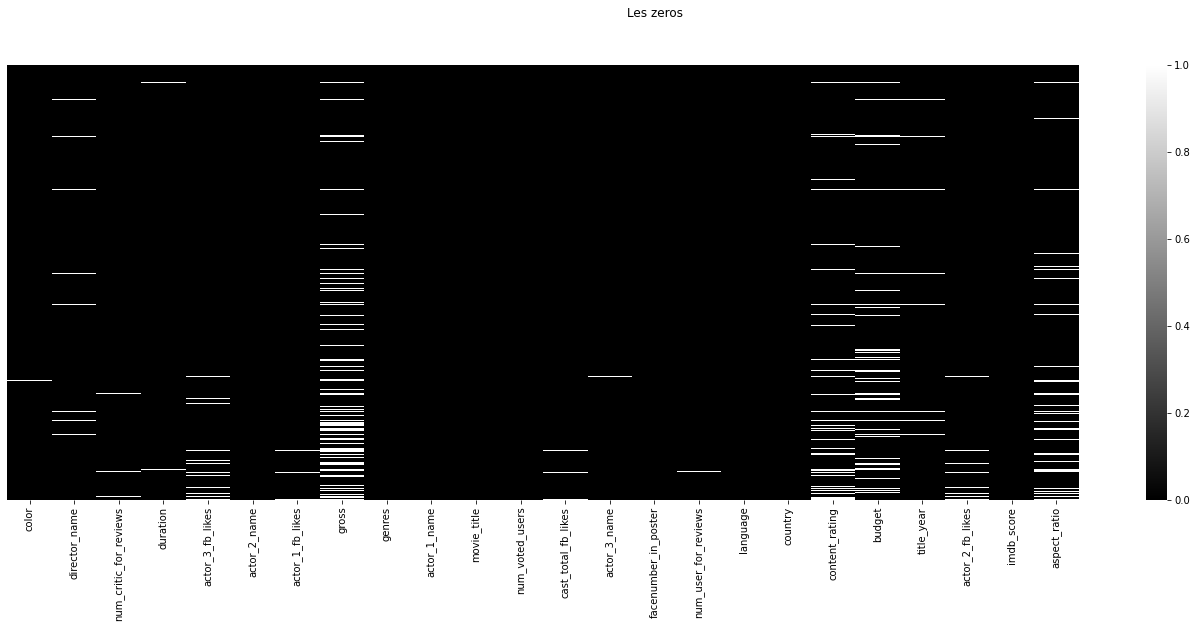

In [82]:
fig = plt.figure(figsize=(24,8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='gray')
plt.suptitle('Les zeros')

#### **Modification de variables**

In [91]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_3_fb_likes', 'actor_2_name', 'actor_1_fb_likes', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_fb_likes', 'actor_3_name', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio'],
      dtype='object')

Verifier l'affichage des informations variables  pour corriger quelques incohérences d'orthographes

In [84]:
df.loc[0].values

array(['Color', 'James Cameron', 723.0, 178.0, 855.0, 'Joel David Moore',
       1000.0, 760505847.0, 'Action|Adventure|Fantasy|Sci-Fi',
       'CCH Pounder', 'Avatar\xa0', 886204, 4834.0, 'Wes Studi', 0.0,
       3054.0, 'English', 'USA', 'PG-13', 237000000.0, 2009.0, 936.0, 7.9,
       1.78], dtype=object)

On voit que dans la notation du titre de film présente  \xa0 qu'il faut enlever

In [89]:
df.movie_title = df.movie_title.apply(lambda x: x.replace('\xa0',''))

Gerer la variable content_rating en detail

In [94]:
df.content_rating.value_counts()

R            2098
PG-13        1444
PG            698
Not Rated     116
G             112
Unrated        60
Approved       55
TV-14          30
TV-MA          19
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

Une petite recherche et on trouve que historiquement, on a plus ou moins :

Passed = Approved = M = GP = PG
TV-14 = PG-13
X = NC-17
Not Rated = Unrated = NR
On veut donc remplacer :

Passed, Approved, M et GP par PG
TV-14 par PG-13
X par NC-17
Not Rated et Unrated par UR qui sont les notations utilisées aujourd'hui.

In [108]:
def update_content_rating(row):
    if row['content_rating'] in ['Passed', 'Approved','M','GP', 'PG']:
        return 'PG'   
    elif row['content_rating'] in ['Not Rated', 'Unrated']:
        return 'UR' 
    elif row['content_rating'] == 'X':
        return 'NC-17'
    elif row['content_rating'] == 'TV-14':
        return 'PG-13'
    else:
        return row['content_rating']
    
df['content_rating'] = df.apply(update_content_rating, axis=1)
df.content_rating.value_counts()

R        2098
PG-13    1474
PG        773
UR        176
G         112
NC-17      20
TV-MA      19
TV-PG      13
TV-G       10
TV-Y        1
TV-Y7       1
Name: content_rating, dtype: int64

Spliter + Dichotomiser la variable genre 

In [ ]:
genre_dummies = df.genres.str.get_dummies('|')
df = pd.concat([df, genre_dummies], axis =1)
df.drop(['genres'], axis=1, inplace=True)

In [118]:
df.language.value_counts()

English       4662
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

Regrouper les films par groupe geographiques de langues pour éviter l'effet des valeurs extremes en ayant European, English et les autres 

In [121]:
def replace_language(row):
    if row['language'] in ['French', 'Spanish', 'German', 'Italian', 'Portuguese', 'Norwegian', 'Dutch',
    'Danish', 'Romanian', 'Bosnian', 'Czech', 'Hungarian', 'Swedish']:
        return 'European'
    elif row['language'] == 'English':
        return 'English'
    else:
        return 'Other languages'
df['language'] = df.apply(replace_language, axis=1)
df.language.value_counts()                       

English            4662
European            174
Other languages     162
Name: language, dtype: int64

Regrouper aussi les pays de films par zone géographiques notamment Europe, North America, Other Countries

In [122]:
df.country.value_counts()

USA              3773
UK                443
France            154
Canada            124
Germany            96
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64

In [124]:
def replace_country(row):
    if row['country'] in ['UK', 'France', 'Spain', 'Germany', 'West Germany', 'Italy', 'Portugal', 'Norway', 'Netherlands',
        'Denmark', 'Ireland', 'Romania', 'Iceland', 'Czech', 'Hungary', 'Sweden', 'Belgium', 'Greece',
        'Bulgaria', 'Switzerland', 'Poland', 'Finland']:
        return 'Europe'
    elif row['country'] in ['USA', 'Canada']:
        return 'North America'
    else:
        return 'Other countries'
    
df['country'] = df.apply(replace_country, axis=1)
df.country.value_counts()

Other countries    4998
Name: country, dtype: int64

## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

In [129]:
df.describe()

,num_critic_for_reviews,duration,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,Action,...,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,4949.000000,4983.000000,4886.000000,4965.000000,4.327000e+03,4.998000e+03,4965.000000,4985.000000,4977.000000,4.597000e+03,4891.000000,4930.000000,4998.000000,4671.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,139.890079,107.213325,651.556897,6591.276334,4.659299e+07,8.347020e+04,9741.259215,1.368907,272.014667,3.938145e+07,2002.468820,1661.328398,6.441056,2.221417,0.228691,...,0.000200,0.041016,0.111244,0.042417,0.026411,0.098639,0.000600,0.000400,0.219688,0.122249,0.001000,0.036214,0.279312,0.042217,0.018808
std,121.477586,25.248775,1655.908321,15093.482352,6.690463e+07,1.380866e+05,18208.485213,2.014623,377.776210,2.050767e+08,12.475235,4049.593515,1.124107,1.391185,0.420032,...,0.014145,0.198348,0.314466,0.201559,0.160369,0.298207,0.024495,0.020002,0.414077,0.327606,0.031616,0.186842,0.448706,0.201104,0.135858
min,1.000000,7.000000,2.000000,2.000000,1.620000e+02,5.000000e+00,2.000000,0.000000,1.000000,2.180000e+02,1916.000000,2.000000,1.600000,1.180000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,144.000000,622.000000,4.548672e+06,8.560000e+03,1438.000000,0.000000,64.000000,6.000000e+06,1999.000000,290.000000,5.800000,1.850000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,103.000000,380.000000,989.000000,2.368988e+07,3.426050e+04,3106.000000,1.000000,156.000000,2.000000e+07,2005.000000,600.500000,6.600000,2.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,638.000000,11000.000000,5.960257e+07,9.612075e+04,13821.000000,2.000000,324.000000,4.400000e+07,2011.000000,919.000000,7.200000,2.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,511.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


une analyse descriptive qui nous donne des quelques caractéristiques descriptives sur les différentes variables de la Dataframe notamment le min, max, moyenne, etc.

<Figure size 1512x504 with 0 Axes>

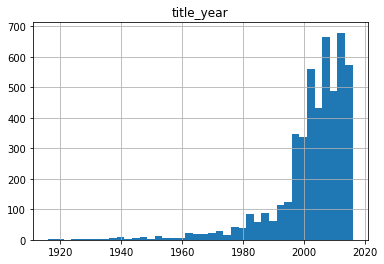

In [146]:
# Films par année de sortie
fig = plt.figure(figsize=(21,7))
df.hist('title_year', bins=40)
plt.show()



In [173]:
# Moyenne des films selon leur genre

# mean_genre = {}
# for gen in df.columns[-24:]:
#     mean_genre[gen] = df.loc[df[gen]==1,'imdb_score'].mean()
#     plt.bar(mean_genre.keys(), mean_genre.values())
#     plt.xticks(rotation=90);
    

In [164]:
df.columns[24:]

Index(['Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

Un heatmap pour voir la correlation entre les différentes variables de la DataFrame. On observe une forte correlation entre certaines variables qui laisse à prendre en compte ces dernières dans le modèle.

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

In [71]:
#transformer la variable color en numerique dichotomique
df = pd.concat((df.drop('color', axis=1), pd.get_dummies(df.color, drop_first=True)), axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,Color
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Ici, l'hypothèse est de tester différentes variables et garder que celles dont les coefficients sont significatifs c'est àd ire impactent le modele.

In [72]:
#definition des variables de manières gloables avec la matrice X qui comprend l'ensemble des variables indépendantes et le vecteur y qui prend que la variable imdb_score
X= df[['num_critic_for_reviews','duration','actor_3_fb_likes', 'gross','num_voted_users','facenumber_in_poster','num_user_for_reviews', 'movie_fb_likes','Color']]
y = df['imdb_score']
X.shape, y.shape

((3954, 9), (3954,))

In [73]:
df.columns.astype

<bound method Index.astype of Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes', 'Color'],
      dtype='object')>

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3163, 9), (791, 9), (3163,), (791,))

In [75]:
#standardisation des variables du modele

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Il est important de souligner ici que la standardisation des varaibles n'impacte pas le modele

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

In [76]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_std, y_train)

LinearRegression()

In [77]:
# Evaluation du  modele de RL avec le score R2

score_train = linear.score(X_train_std, y_train)
score_test = linear.score(X_test_std, y_test)
print(f"{score_train =} et {score_test = }")

score_train =0.3350634797235026 et score_test = 0.3012217422778609


In [78]:
# Les coefficients du modele et leurs significations
from statsmodels.api import OLS, add_constant

model = OLS(y_train, add_constant(X_train_std))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sat, 01 Jan 2022   Prob (F-statistic):          1.21e-271
Time:                        21:10:34   Log-Likelihood:                -4013.1
No. Observations:                3163   AIC:                             8046.
Df Residuals:                    3153   BIC:                             8107.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4735      0.015    422.401      0.0

Les différents coefficients du modele ci-dessus matérialisé par les valeurs de p_value sont tous très significatifs au seuil de 1/1000 à l'exception de celui de la variable 'movie_fb_likes' qui  l'est au seuil de 5%.
Une mesure d'évaluation du modèle est le R2. Ainsi la variance du modele est expliquée à 0.33 par celle des variables indépendantes. 

In [79]:
#Validation croisé pour une meilleure estimation du modele

from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X_train_std, y_train, cv=None)

array([0.32774022, 0.30905829, 0.36131602, 0.3213097 , 0.33474193])

In [80]:
#Calcul des erreurs standard servant d'indicateur d'amélioration du modele 

from sklearn.metrics import mean_squared_error
error0 = round(mean_squared_error(linear.predict(X_test_std),y_test), 4)
error0

0.8069

*facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

 Modele de Regression Ridge avec les parametres de penalisation

In [81]:
# Définition des coefficients de regularisation à tester 
alphas = np.logspace(-5, 5, 200)

In [82]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# on va entrainer le modèle

coefs = []
errors = []
for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)
  errors.append(mean_squared_error(ridge.predict(X_test), y_test))


/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.16408e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.16408e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.16408e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.16408e-18): result may not be accurate.
  return linalg.solve(A, Xy, sy

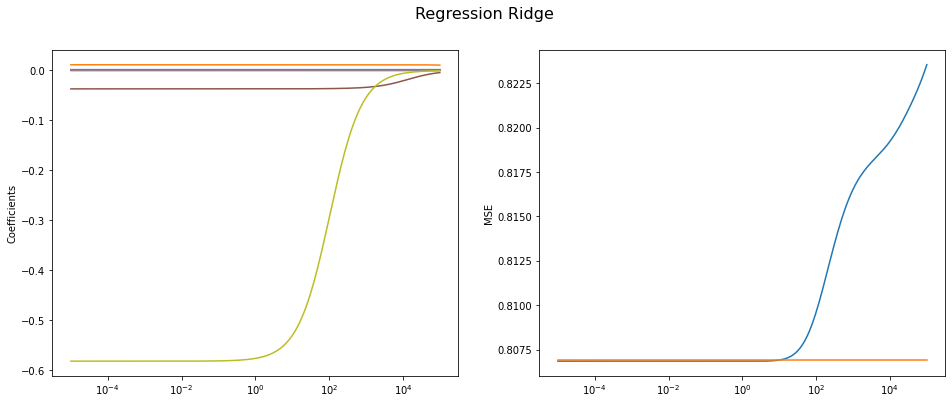

In [83]:
# Mettons en exergue l'affichage des courbes d'évolution des coef et des erreurs en foncion des valeurs de alphas
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))


ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_label('Paramètres de régularisation')
ax1.set_ylabel('Coefficients')

ax2.plot(alphas, errors,[10**-5, 10**5],[error0, error0])
ax2.set_xscale('log')
ax2.set_label('Paramètres de régularisation')
ax2.set_ylabel('MSE')

plt.suptitle('Regression Ridge', fontsize=16)

plt.show()

In [84]:
#Erreur minimum de la regression Ridge et la valeur de alpha qui minimise le modele

print(round(min(errors), 4), '\n', alphas[np.argmin(errors)])

0.8069 
 1.6831803533309584


 Modele de Regression Lasso avec les parametres de penalisation

In [85]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# entrainer le modele

coefs = []
errors = []
for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X_train_std, y_train)
  coefs.append(lasso.coef_ )
  errors.append(mean_squared_error(lasso.predict(X_test_std), y_test))

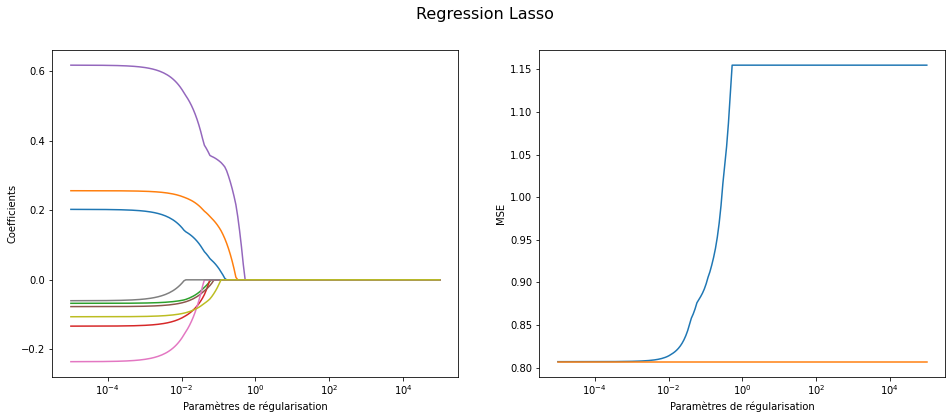

In [86]:
# Mettons en exergue l'affichage des courbes d'évolution des coef et des erreurs en foncion des valeurs de alphas

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('Paramètres de régularisation')
ax1.set_ylabel('Coefficients')


ax2.plot(alphas, errors, [10**-5, 10**5], [error0, error0])
ax2.set_xscale('log')
ax2.set_xlabel('Paramètres de régularisation')
ax2.set_ylabel('MSE')


plt.suptitle('Regression Lasso', fontsize=16)
plt.show()

In [87]:
#Erreur minimum de la regression Ridge et la valeur de alpha qui minimise le modele
print(round(min(errors),4), '\n', alphas[np.argmin(errors)])

0.8069 
 1e-05


<a id='autres_reg'></a>

## **7. D'autres modèles de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score` ou `cross_validate`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

Etant donnée que la variable dépendante du modèle est une variable continue, d'autres modèles de régression existent pour prédire ce modèle comme knn, svm, random forest, etc...

In [88]:
#Tester chaque valeur du modele knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

cvgrid = GridSearchCV(
  estimator=KNeighborsRegressor(),
  param_grid={'n_neighbors':list(range(1, 10))},
  scoring='neg_mean_squared_error',
  return_train_score=False,
  cv = KFold(n_splits=10, shuffle=True)
)
cvgrid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [89]:
cross_val_score(KNeighborsRegressor(), X_train_std, y_train, cv =5)

array([0.31295858, 0.3005358 , 0.34901684, 0.29587401, 0.33576978])

In [90]:
cvgrid.best_estimator_

KNeighborsRegressor(n_neighbors=9)

In [91]:
# Importer toutes les libraires necessaires à la mise en place des modeles de régression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

models = {

  'knn': KNeighborsRegressor(n_neighbors=10),
  'linear': LinearRegression(),
  'ridge': Ridge(),
  'lasso': Lasso(),
  'svr_l': SVR(kernel='linear', gamma='auto', C=1, degree=3),
  'svr_r': SVR(kernel='rbf', gamma='auto', C=1, degree=3),
  'svr_p': SVR(kernel='poly', gamma='auto', C=1, degree=3),
  'rfor': RandomForestRegressor(criterion='mse', max_depth=2, random_state=0)

}
for i, j in models.items():
  model = j
  scores = cross_val_score(model, X_train_std, y_train, cv=5)

  print(f"Le score de validation croisée du modele {i}: {scores} / score_moyen = {np.mean(scores)} / ")



Le score de validation croisée du modele knn: [0.36247724 0.31156909 0.39609139 0.33458692 0.37600056] / score_moyen = 0.35614504150361076 / 
Le score de validation croisée du modele linear: [0.32774022 0.30905829 0.36131602 0.3213097  0.33474193] / score_moyen = 0.3308332311925965 / 
Le score de validation croisée du modele ridge: [0.32775552 0.30899835 0.36133289 0.32129353 0.33481043] / score_moyen = 0.3308381445201699 / 
Le score de validation croisée du modele lasso: [-4.77724358e-04 -1.10203659e-03 -6.51647266e-05 -4.64443601e-03
 -3.17855094e-05] / score_moyen = -0.0012642294385313945 / 
Le score de validation croisée du modele svr_l: [0.32437543 0.29558485 0.34779593 0.31942551 0.31431203] / score_moyen = 0.32029875061597296 / 
Le score de validation croisée du modele svr_r: [0.45002908 0.36286692 0.44520859 0.4267696  0.42433329] / score_moyen = 0.4218414949876882 / 
Le score de validation croisée du modele svr_p: [ -0.44420464 -13.48063848   0.07433853  -1.41491815  -0.907167

/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which

Le score de validation croisée du modele rfor: [0.31657385 0.22077581 0.31074256 0.29681989 0.31347858] / score_moyen = 0.2916781364319541 / 


/Users/enyonadjanor/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


<a id='irr'></a>

<a id='reg_to_class'></a>

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

In [92]:
# Transformons la variable dépendante numérique continue en variable catégorielle ordinale

df2 = df
df2['binned_score'] = pd.cut(df2['imdb_score'], bins=[0,2,4,6,8,10], right=True, labels= ['nul', 'bof', 'sympa', 'bon','super'])

# Suppression de l'ancienne variable continue

df2.drop('imdb_score', axis=1, inplace=True)

In [93]:
df2['binned_score'].value_counts()

bon      2579
sympa    1102
super     175
bof        92
nul         6
Name: binned_score, dtype: int64

Le choix des bins(seuil): je voulais répartir les scores en part égale suivant les bornes d'intervalles

<a id='reglog'></a>

In [94]:
#definition des variables de manières gloables avec la matrice X qui comprend l'ensemble des variables indépendantes et le vecteur y qui prend que la variable imdb_score
X= df2[['num_critic_for_reviews','duration','actor_3_fb_likes', 'gross','num_voted_users','facenumber_in_poster','num_user_for_reviews', 'movie_fb_likes','Color']]
y2 = df2['binned_score']
X.shape, y.shape

((3954, 9), (3954,))

On va entrainer à nouveau le model avec des la nouvelles variable dépendante y2

In [95]:
# Entrainement du modele de regression

from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y2_train.shape, y2_test.shape

((3163, 9), (791, 9), (3163,), (791,))

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

,predit bof,predit bon,predit nul,predit super,predit sympa
vrai bof,0,16,0,1,0
vrai bon,0,460,0,60,6
vrai nul,0,1,0,0,0
vrai super,0,26,1,12,0
vrai sympa,0,192,0,6,10


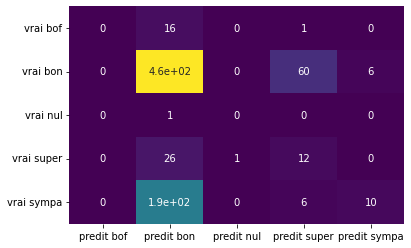

In [96]:
# Entraînement du modèle
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver='liblinear')
reglog.fit(X_train, y2_train)

# Les predictions du modele
y2_pred = reglog.predict(X_test)

# Affichage des prdictions du modele via matrix de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_pred, y2_test, labels=reglog.classes_)
cm = pd.DataFrame(confusion_matrix(y2_test, y2_pred),
             columns=[f'predit {k}' for k in reglog.classes_],
             index = [f'vrai {k}' for k in reglog.classes_])

sns.heatmap(cm, annot=True, cmap="viridis", cbar=False)
cm


In [100]:

import statsmodels.api as sm
X_const = sm.add_constant(X_train)
reglog1 = sm.Logit(y2_test, X_const)
print(reglog1.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

<a id='option'></a>

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

<a id='save'></a>

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  